In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex
import numpy as np

import glob
frac = 0.01
# path ='./data/RFReg_' # use your path
path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
allFiles

['./../data/Pobreza/pobreza_0.01_q2010-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-08-15.csv',
 './../data/Pobreza/pobreza_0.0

In [3]:
cpi_M = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_M.csv', index_col=0)
cpi_M.index = pd.to_datetime(cpi_M.index)

cpi_Q = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_Q.csv', index_col=0)
cpi_Q.index = pd.to_datetime(cpi_Q.index)

cpi_actual = cpi_M.loc['2022-05']['index'][0]
cpi_2010Q4 = cpi_Q.loc['2010-11']['index'][0]
cpi_ref = cpi_M.loc['2016-01']['index'][0]

In [4]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [5]:
# df_list = []
# for f in allFiles:
#     print(f)
    
f = './../data/Pobreza/pobreza_0.01_q2010-11-15.csv'
groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
vars_ = ['INGRESO', 'P47T_persona']

data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
data = data.merge(aglo_labels)
data['AGLO_si'] = data.AGLOMERADO != 0
data['Total'] = True

data = data.loc[data.AGLO_si == 1]

data.loc[data.INGRESO == 0, 'decil_P47T'] = 'sin ingresos'
data.loc[data.INGRESO == 1, 'P47T_persona'] = data.loc[data.INGRESO == 1, 'P47T_persona'] + np.random.uniform(0, .01, data.INGRESO.sum())
data.loc[data.INGRESO == 1, 'decil_P47T'] = pd.qcut(data.loc[data.INGRESO == 1, 'P47T_persona'], q = 10, labels = range(1, 11))

data['Q'] = pd.to_datetime(data['Q'])
# df104 = df.loc[df.Q == '2010-11-15']

In [6]:
# df104 = df.loc[df.Q == '2010-11-15']

In [7]:
# pd.read_csv(f, nrows = 5).T

In [8]:
## Tabla:

# Personas con ingresos (aprox 14.377, sin ingresos 10.510 para un total de 24.887 en aglos)


In [9]:
tabla = data.groupby(['decil_P47T']).agg({'P47T_persona': ['min', 'max', 'size', 'sum', 'mean']})['P47T_persona']
tabla[['min', 'max', 'sum', 'mean']] = tabla[['min', 'max', 'sum', 'mean']]*(cpi_2010Q4/cpi_ref)
tabla[['size', 'sum']] = 100*tabla[['size', 'sum']]
tabla['pct'] = 100*tabla['sum']/tabla['sum'].sum()
tabla.loc['Total'] = tabla.iloc[:-1].agg({'min': 'min', 'max': 'max','size': 'sum', 'sum': 'sum', 'mean': 'mean', 'pct': 'sum'})

tabla[['min', 'max', 'sum', 'mean']] = tabla[['min', 'max', 'sum', 'mean']].round(-1).astype(int)
tabla['size'] = (tabla['size']/1e3).round(1)
tabla['sum'] = (tabla['sum']/1e6).round(1)
tabla['pct'] = tabla['pct'].round(1)
tabla.columns = ['Mínimo', 'Máximo', 'Población (miles)', 'Ingresos (mill. ARS)', 'Media', '% de suma de ingresos']
tabla

,Mínimo,Máximo,Población (miles),Ingresos (mill. ARS),Media,% de suma de ingresos
decil_P47T,,,,,,
1,30,500,1555.1,511.8,330,1.4
2,500,800,1555.0,1045.2,670,2.8
3,800,1040,1555.0,1463.5,940,3.9
4,1040,1400,1555.0,1862.3,1200,5.0
5,1400,1750,1555.1,2406.2,1550,6.5
6,1750,2030,1555.0,3008.3,1930,8.1
7,2030,2700,1555.0,3754.9,2410,10.1
8,2700,3500,1555.0,4729.8,3040,12.7
9,3500,5000,1555.0,6422.1,4130,17.2


## Series de tiempo

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01

path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
# allFiles


def moving_avg(table):
    ## Label left. The roilling means are centered nearly on the right date, although one day early.
    # i.e. 2009-12-31 is the average for 07-2009 to 06-2010
    return table.resample('Q', label = 'left').mean().interpolate('linear').rolling(4, center = True).mean()


In [4]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [22]:
# Percentile funcs
def q10(x):
    return x.quantile(0.1)

def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

def q90(x):
    return x.quantile(0.9)

In [82]:
mon_cols = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IPCF']

df_list = []
for f in allFiles:
    print(f)
    
    vars_ = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IX_TOT']
    data = pd.read_csv(f, usecols = ['HOGAR_REF_ID', 'Q', 'AGLOMERADO'] + vars_)
    data = data.loc[data.AGLOMERADO != 0]
    data = data.drop_duplicates()
    
    data['IPCF'] = data['P47T_hogar']/data['IX_TOT']
    
    table = data.groupby(['Q'])[mon_cols].agg(['mean', q10, q25, 'median', q75, q90])

    df_list += [table]
    
df = pd.concat(df_list)

# df10 = df.loc[df.Q.dt.year == 2010]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv
./../data/Pobreza/pobreza_0.01_q2012-02-15.csv
./../data/Pobreza/pobreza_0.01_q2012-05-15.csv
./../data/Pobreza/pobreza_0.01_q2012-08-15.csv
./../data/Pobreza/pobreza_0.01_q2012-11-15.csv
./../data/Pobreza/pobreza_0.01_q2013-02-15.csv
./../data/Pobreza/pobreza_0.01_q2013-05-15.csv
./../data/Pobreza/pobreza_0.01_q2013-08-15.csv
./../data/Pobreza/pobreza_0.01_q2013-11-15.csv
./../data/Pobreza/pobreza_0.01_q2014-02-15.csv
./../data/Pobreza/pobreza_0.01_q2014-05-15.csv
./../data/Pobreza/pobreza_0.01_q2014-08-15.csv
./../data/Pobreza/pobreza_0.01_q2014-11-15.csv
./../data/Pobreza/pobreza_0.01_q2015-02-15.csv
./../data/Pob

In [86]:
df.index = pd.to_datetime(df.index)

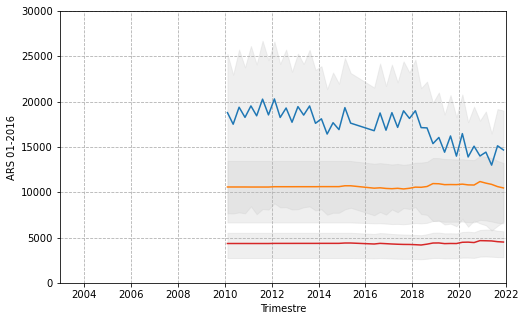

In [92]:
fig, ax = plt.subplots(1, figsize = (8, 5))

for i, v in enumerate(['CBA', 'CBT', 'P47T_hogar']):
    ax.fill_between(x = df.index, y1 = df[v].q25, y2 = df[v].q75, color = '.8', alpha = .3)

    c = ['#d62728', '#ff7f0e', '#1f77b4'][i]
    ax.plot(df.index, df[v]['mean'], color = c)

    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, 3e4)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('ARS 01-2016')

plt.show()

Text(0, 0.5, 'ARS 01-2016')

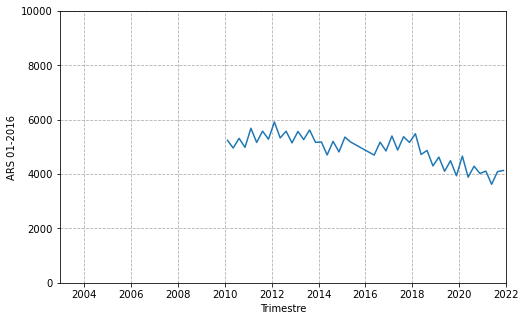

In [97]:
fig, ax = plt.subplots(1, figsize = (8, 5))
ax.plot(df.index, df['IPCF']['median'], color = c)
ax.grid(linestyle = '--')
ax.set_xlim('2003', '2022')
ax.set_ylim(0, 1e4)
ax.set_xlabel('Trimestre')
ax.set_ylabel('ARS 01-2016')

In [ ]:
# ['P02', 'CAT_OCUP', 'CAT_INAC', 'INGRESO', 'Grupo_Etario_INDEC', 'PP07K', 'Pobreza', 'Indigencia'
# 'CBA', 'CBT', 'CB_EQUIV', 'P47T_persona', 'P47T_hogar', 'gap_pobreza', 'gap_indigencia']